In [40]:
import pandas as pd
df=pd.read_csv('/Users/shivamsourav/Desktop/Mumbai.csv')
df.head(2)

time  tavg  tmin  tmax  prcp
0  01-01-1990  23.2  17.0   NaN   0.0
1  02-01-1990  22.2  16.5  29.9   0.0

In [41]:
df.isnull().sum()

time       0
tavg      11
tmin    2454
tmax    1907
prcp    4681
dtype: int64

In [42]:
df=df.drop(['tmin','tmax','prcp'],axis=1)

In [43]:
df.head(2)

time  tavg
0  01-01-1990  23.2
1  02-01-1990  22.2

In [44]:
df.isnull().sum()

time     0
tavg    11
dtype: int64

In [45]:
df.shape

(11894, 2)

In [46]:
df.mean()

/var/folders/0n/xc9648gx0gsbnhr2j2xllfr00000gn/T/ipykernel_31261/3698961737.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



tavg    27.762509
dtype: float64

In [47]:
df=df.fillna(df.mean())

/var/folders/0n/xc9648gx0gsbnhr2j2xllfr00000gn/T/ipykernel_31261/3358723971.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [52]:
df.isnull().sum()

time    0
tavg    0
dtype: int64

In [49]:
df.shape

(11894, 2)

In [54]:
df['time'].unique()

array(['01-01-1990', '02-01-1990', '03-01-1990', ..., '23-07-2022',
       '24-07-2022', '25-07-2022'], dtype=object)

In [56]:
df['time']=pd.to_datetime(df['time'],infer_datetime_format=True)

In [57]:
import plotly.express as px
fig=px.bar(df,x='time',y=['tavg'],title='MUMBAI TEMPERATURE YEAR WISE')
fig.update_layout(legend_orientation="h",legend=dict(x= 0.3, y=1.1),template='none')
fig.show()

In [61]:
df.columns=['ds','y']
df.tail(5)

ds     y
11889 2022-07-21  27.6
11890 2022-07-22  28.3
11891 2022-07-23  28.2
11892 2022-07-24  28.1
11893 2022-07-25  28.3

In [62]:
from prophet import Prophet
model=Prophet()

In [63]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [65]:
new_df= model.make_future_dataframe(periods=365)
new_df.tail(5)

ds
12254 2023-12-03
12255 2023-12-04
12256 2023-12-05
12257 2023-12-06
12258 2023-12-07

In [67]:
result = model.predict(new_df)
result.tail(5)

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
12254 2023-12-03  28.338044   25.650122   30.467240    28.298057    28.373821   
12255 2023-12-04  28.337978   25.835347   30.475214    28.297728    28.373866   
12256 2023-12-05  28.337912   25.401414   30.282232    28.297399    28.373911   
12257 2023-12-06  28.337846   25.166503   30.234270    28.297070    28.374013   
12258 2023-12-07  28.337781   25.402869   29.981891    28.296741    28.374142   

       additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
12254       -0.122823             -0.122823             -0.122823  0.025464   
12255       -0.290618             -0.290618             -0.290618  0.005084   
12256       -0.452993             -0.452993             -0.452993 -0.001898   
12257       -0.591456             -0.591456             -0.591456  0.020040   
12258       -0.795105             -0.795105             -0.795105 -0.021297   

       weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
12254      0.025464      0.025464 -0.148288     -0.148288     -0.148288   
12255      0.005084      0.005084 -0.295702     -0.295702     -0.295702   
12256     -0.001898     -0.001898 -0.451095     -0.451095     -0.451095   
12257      0.020040      0.020040 -0.611496     -0.611496     -0.611496   
12258     -0.021297     -0.021297 -0.773808     -0.773808     -0.773808   

       multiplicative_terms  multiplicative_terms_lower  \
12254                   0.0                         0.0   
12255                   0.0                         0.0   
12256                   0.0                         0.0   
12257                   0.0                         0.0   
12258                   0.0                         0.0   

       multiplicative_terms_upper       yhat  
12254                         0.0  28.215221  
12255                         0.0  28.047360  
12256                         0.0  27.884920  
12257                         0.0  27.746390  
12258                         0.0  27.542676

In [77]:
data = result[['ds','trend','yhat','yhat_lower','yhat_upper']]
data.columns=['date','trend','final_outcome(predicted)','final_outcome_lower_limit','final_outcome_upper_limit']
data.tail(5)

date      trend  final_outcome(predicted)  \
12254 2023-12-03  28.338044                 28.215221   
12255 2023-12-04  28.337978                 28.047360   
12256 2023-12-05  28.337912                 27.884920   
12257 2023-12-06  28.337846                 27.746390   
12258 2023-12-07  28.337781                 27.542676   

       final_outcome_lower_limit  final_outcome_upper_limit  
12254                  25.650122                  30.467240  
12255                  25.835347                  30.475214  
12256                  25.401414                  30.282232  
12257                  25.166503                  30.234270  
12258                  25.402869                  29.981891

In [78]:
from prophet.plot import plot_plotly
from plotly.offline import iplot

In [79]:
fig=plot_plotly(model,result)
iplot(fig)

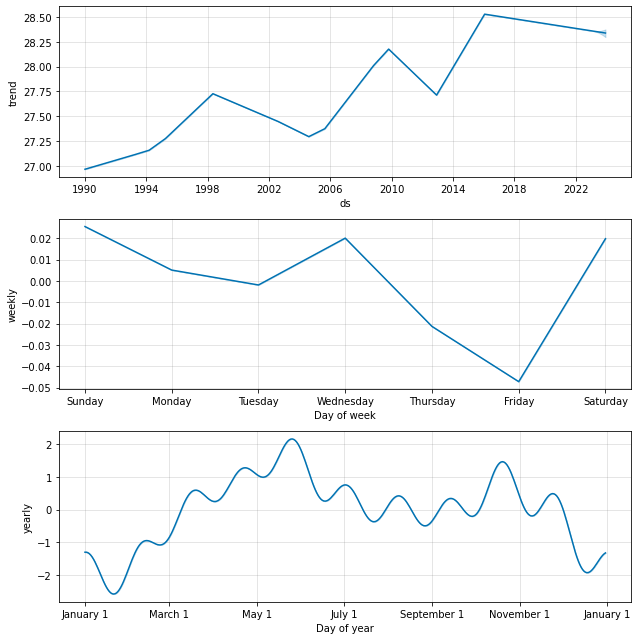

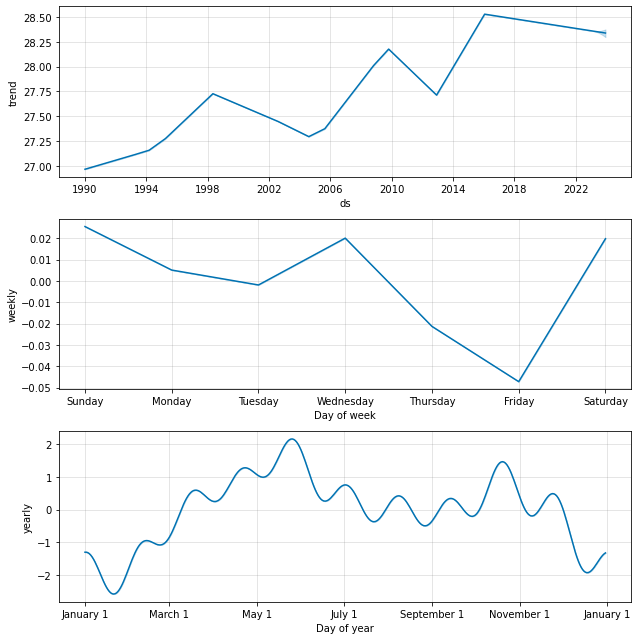

In [80]:
model.plot_components(result)